<a href="https://colab.research.google.com/github/gc2321/3235-Machine-Learning/blob/main/XTRA_NEURO_NET_EXERCISES/5_autoencoder_food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import tensorflow as tf
random.seed(42)

In [2]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/gdrive')

import fileinput
filePath ="/content/gdrive/MyDrive/neural_data/UK_foods.csv"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
df = pd.read_csv(filePath,index_col='Unnamed: 0')

In [8]:
df.head()

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209


In [9]:
df.transpose()

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


<Axes: >

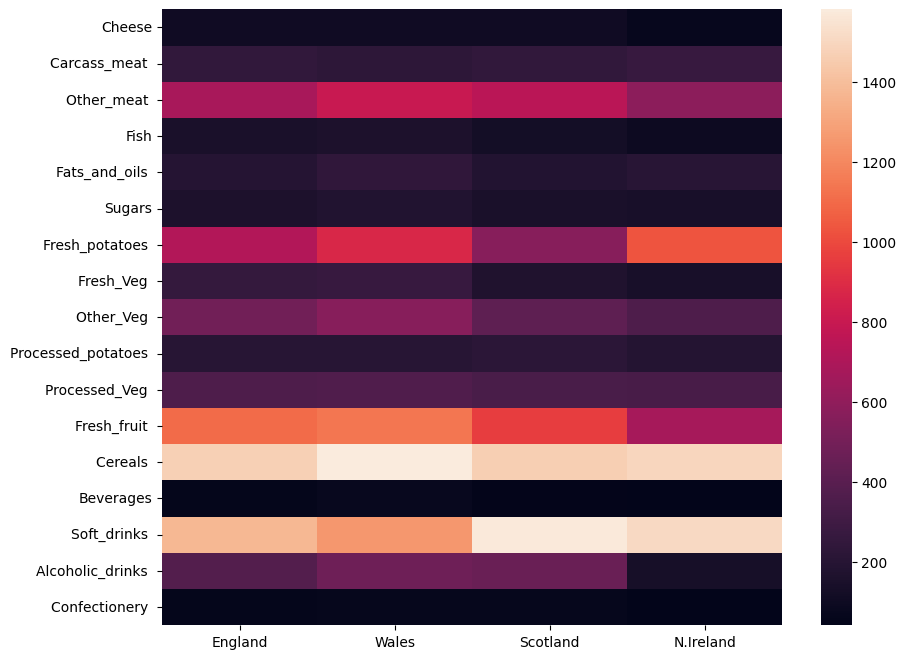

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [27]:
encoder = Sequential()
encoder.add(Dense(units=8,activation='relu',input_shape=[17]))
encoder.add(Dense(units=4,activation='relu'))
encoder.add(Dense(units=2,activation='relu'))

In [28]:
decoder = Sequential()
decoder.add(Dense(units=4,activation='relu',input_shape=[2]))
decoder.add(Dense(units=8,activation='relu'))
decoder.add(Dense(units=17,activation='relu'))

In [29]:
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss="mse" ,optimizer=SGD(lr=1.5))

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [31]:
scaled_df = scaler.fit_transform(df.transpose().values)

In [32]:
scaled_df

array([[1.        , 0.45      , 0.4562212 , 0.80597015, 0.17647059,
        0.47222222, 0.32976445, 0.90163934, 0.61860465, 0.33333333,
        0.83870968, 0.92440605, 0.08333333, 0.38461538, 0.37341772,
        0.70588235, 0.56521739],
       [0.94871795, 0.        , 1.        , 1.        , 1.        ,
        1.        , 0.65952891, 1.        , 1.        , 0.48484848,
        1.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 1.        ],
       [0.94871795, 0.375     , 0.75576037, 0.43283582, 0.        ,
        0.22222222, 0.        , 0.2295082 , 0.29302326, 1.        ,
        0.09677419, 0.6112311 , 0.        , 0.23076923, 1.        ,
        0.95      , 0.91304348],
       [0.        , 1.        , 0.        , 0.        , 0.49019608,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.26666667, 0.        , 0.79113924,
        0.        , 0.        ]])

In [33]:
autoencoder.fit(scaled_df,scaled_df,epochs=15)

Epoch 1/15
1/1 [==============================] - 1s 955ms/step - loss: 0.4259
Epoch 2/15
1/1 [==============================] - 0s 11ms/step - loss: 0.4254
Epoch 3/15
1/1 [==============================] - 0s 12ms/step - loss: 0.4247
Epoch 4/15
1/1 [==============================] - 0s 11ms/step - loss: 0.4240
Epoch 5/15
1/1 [==============================] - 0s 14ms/step - loss: 0.4232
Epoch 6/15
1/1 [==============================] - 0s 13ms/step - loss: 0.4225
Epoch 7/15
1/1 [==============================] - 0s 11ms/step - loss: 0.4217
Epoch 8/15
1/1 [==============================] - 0s 11ms/step - loss: 0.4210
Epoch 9/15
1/1 [==============================] - 0s 17ms/step - loss: 0.4203
Epoch 10/15
1/1 [==============================] - 0s 12ms/step - loss: 0.4195
Epoch 11/15
1/1 [==============================] - 0s 12ms/step - loss: 0.4188
Epoch 12/15
1/1 [==============================] - 0s 11ms/step - loss: 0.4181
Epoch 13/15
1/1 [==============================] - 0s 12ms/s

In [34]:
encoded_2dim = encoder.predict(scaled_df)

1/1 [==============================] - 0s 91ms/step


In [35]:
encoded_2dim

array([[1.0944426 , 0.0048262 ],
       [1.9587928 , 0.6302182 ],
       [1.2468295 , 0.        ],
       [0.3340456 , 0.01504502]], dtype=float32)

In [36]:
df.transpose().index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [37]:
results = pd.DataFrame(data=encoded_2dim,index=df.transpose().index,
                      columns=['C1','C2'])

In [38]:
results = results.reset_index()

In [39]:
results

,index,C1,C2
0,England,1.094443,0.004826
1,Wales,1.958793,0.630218
2,Scotland,1.246830,0.000000
3,N.Ireland,0.334046,0.015045


<Axes: xlabel='C1', ylabel='C2'>

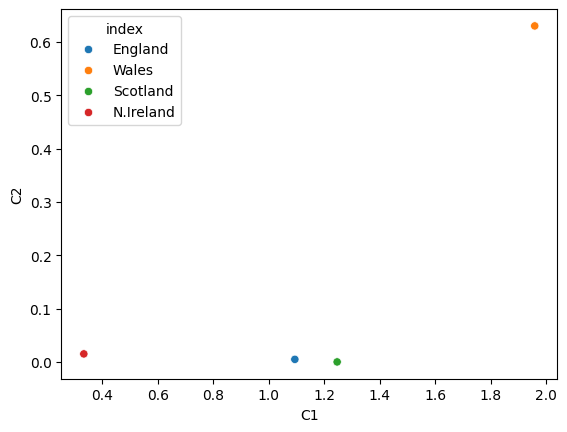

In [40]:
sns.scatterplot(x='C1',y='C2',data=results,hue='index')